***MOVIE RECOMMENDATION SYSTEM USING MACHINE LEARNING AND COLLABRATIVE FILTERING TECHNIQUES.***

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loading csv file into pandas dataframe

# read ratings file
ratings = pd.read_csv("/content/ratings.csv")


In [55]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


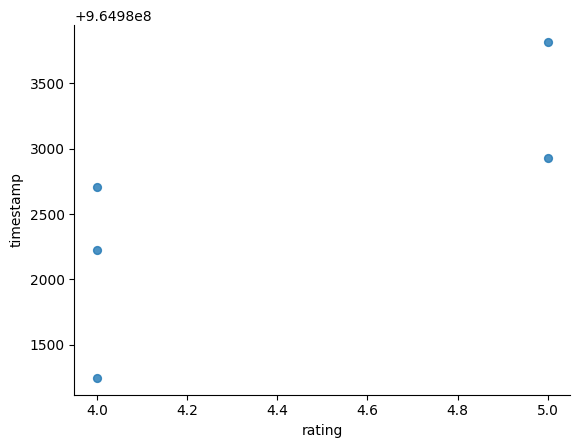

In [52]:
from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

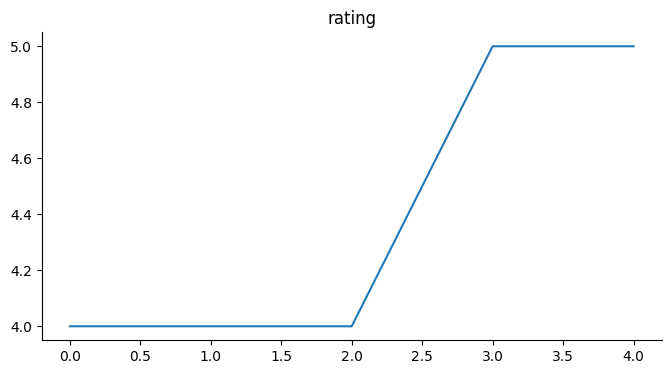

In [53]:
from matplotlib import pyplot as plt
_df_22['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

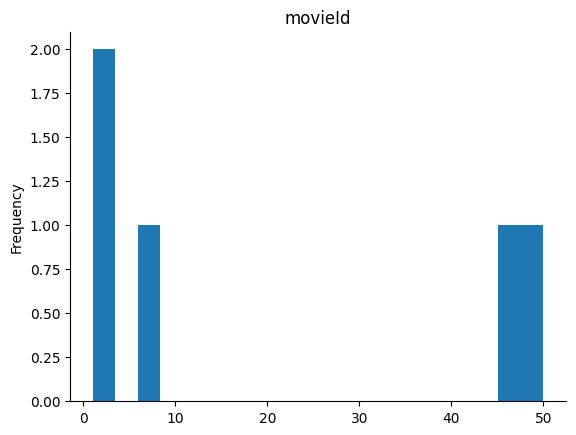

In [54]:
from matplotlib import pyplot as plt
_df_12['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
ratings.tail()


,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


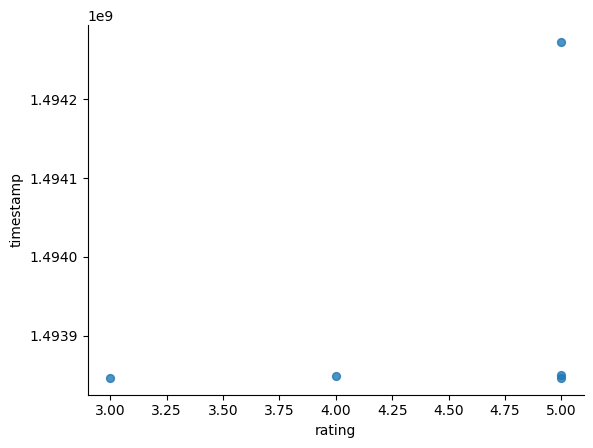

In [50]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

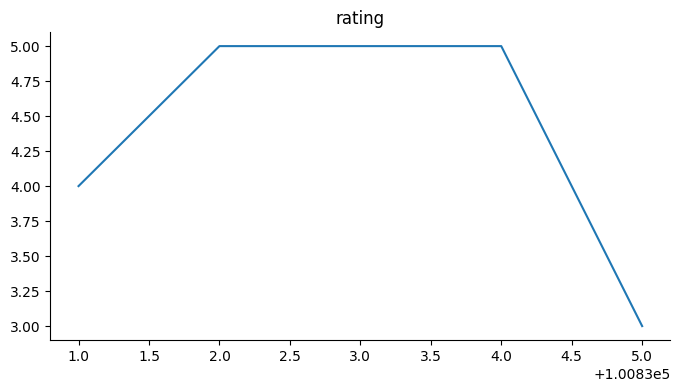

In [49]:
from matplotlib import pyplot as plt
_df_10['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

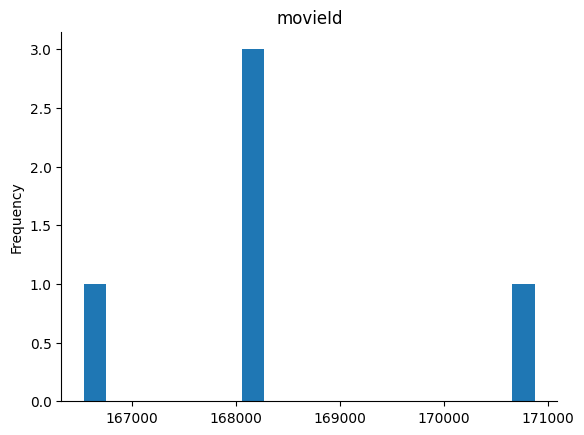

In [48]:
from matplotlib import pyplot as plt
_df_0['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
ratings.shape

(100836, 4)

In [8]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(ratings, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(70585, 4)
(30251, 4)


In [10]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
# The movies not rated by user is marked as 1 for prediction
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)


In [13]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
dummy_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.01799262 0.02914591 ... 0.22586534 0.12184689 0.13241346]
 [0.01799262 1.         0.         ... 0.04299081 0.03472882 0.0625667 ]
 [0.02914591 0.         1.         ... 0.00378273 0.         0.02382229]
 ...
 [0.22586534 0.04299081 0.00378273 ... 1.         0.10982639 0.21962266]
 [0.12184689 0.03472882 0.         ... 0.10982639 1.         0.05416081]
 [0.13241346 0.0625667  0.02382229 ... 0.21962266 0.05416081 1.        ]]
(610, 610)


In [16]:
'''
# using cosine distance
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = 1 - pairwise_distances(df_movie_features, metric = 'cosine')
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)
'''

"\n# using cosine distance \nfrom sklearn.metrics.pairwise import pairwise_distances\n\n# User Similarity Matrix using Cosine similarity as a similarity measure between Users\nuser_similarity = 1 - pairwise_distances(df_movie_features, metric = 'cosine')\nuser_similarity[np.isnan(user_similarity)] = 0\nprint(user_similarity)\nprint(user_similarity.shape)\n"

In [17]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[8.52008912e+01, 3.99290227e+01, 2.08165173e+01, ...,
        2.81820351e-02, 2.81820351e-02, 1.57425084e-01],
       [2.45531356e+01, 1.05987273e+01, 2.94172315e+00, ...,
        8.74389309e-02, 8.74389309e-02, 4.49741734e-01],
       [4.22670774e+00, 2.11463396e+00, 9.59320674e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.49265311e+01, 4.92867089e+01, 2.12555470e+01, ...,
        2.51644930e-02, 2.51644930e-02, 5.92666313e-01],
       [7.50962548e+01, 3.56578151e+01, 1.17138113e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.43083908e-02],
       [7.67153155e+01, 3.67625117e+01, 1.11564580e+01, ...,
        2.61466866e-01, 2.61466866e-01, 8.03583319e-01]])

In [18]:
user_predicted_ratings.shape

(610, 8566)

In [19]:
# np.multiply for cell-by-cell multiplication

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,39.929023,0.000000,1.220732,10.483532,0.000000,14.082187,2.605186,4.111435,47.981999,...,0.083324,0.036234,0.028182,0.032208,0.032208,0.028182,0.032208,0.028182,0.028182,0.157425
2,24.553136,10.598727,2.941723,0.085473,2.773060,10.458197,2.308815,0.523106,0.588578,11.698251,...,0.054182,0.112421,0.087439,0.099930,0.099930,0.087439,0.099930,0.087439,0.087439,0.449742
3,4.226708,2.114634,0.959321,0.066644,0.308448,2.855740,0.518991,0.105484,0.190006,2.550762,...,0.008707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,50.832807,23.786786,9.793001,0.706291,6.609481,24.594138,10.881808,1.505819,2.196956,27.970658,...,0.005910,0.065396,0.050864,0.058130,0.058130,0.050864,0.058130,0.050864,0.050864,0.106328
5,60.794262,36.875980,12.358414,2.321889,13.215004,29.323176,14.149193,3.043103,2.351687,47.983608,...,0.108995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103332


In [20]:
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
480    87.452973
150    86.994790
457    81.930003
593    80.807548
1      61.416804
Name: 43, dtype: float64

In [21]:
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,4.0,2.5,0.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.3250275  0.20868811 ... 0.         0.         0.        ]
 [0.3250275  1.         0.16373912 ... 0.         0.         0.        ]
 [0.20868811 0.16373912 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(8566, 8566)


In [23]:
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

array([[1.70457674e+02, 1.45736065e+02, 1.43879168e+02, ...,
        4.90965204e-01, 4.90965204e-01, 2.29232951e+00],
       [1.47046553e+01, 1.27977597e+01, 7.41114463e+00, ...,
        4.11059622e-01, 4.11059622e-01, 2.92895445e+00],
       [4.64495934e+00, 3.92745275e+00, 3.15259091e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.43701501e+02, 3.24195971e+02, 2.65563257e+02, ...,
        1.03906576e+00, 1.03906576e+00, 1.84582165e+01],
       [2.59031967e+01, 2.12250531e+01, 1.32545528e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.54245954e-01],
       [5.33648012e+02, 4.18264714e+02, 2.11408804e+02, ...,
        1.91118832e+01, 1.91118832e+01, 3.78219746e+01]])

In [24]:
'''
item_predicted_ratings = np.dot(item_similarity, movie_features).T
item_predicted_ratings
'''

'\nitem_predicted_ratings = np.dot(item_similarity, movie_features).T\nitem_predicted_ratings\n'

In [25]:
item_predicted_ratings.shape

(610, 8566)

In [26]:
dummy_train.shape

(610, 8566)

In [27]:
# np.multiply for cell-by-cell multiplication

item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,145.736065,0.000000,17.752252,60.018339,0.000000,64.555580,56.220407,28.999703,143.817617,...,1.537469,0.490965,0.490965,0.490965,0.490965,0.490965,0.490965,0.490965,0.490965,2.292330
2,14.704655,12.797760,7.411145,0.269430,5.804070,10.243947,3.230076,4.735767,1.599833,10.960730,...,0.461311,0.411060,0.411060,0.411060,0.411060,0.411060,0.411060,0.411060,0.411060,2.928954
3,4.644959,3.927453,3.152591,0.227362,0.903036,4.159893,1.724414,0.864785,1.312176,4.381157,...,0.047166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,82.099482,70.871325,49.487513,10.082054,34.732576,65.274992,41.705394,29.677329,12.913699,70.165084,...,0.069251,0.629317,0.629317,0.629317,0.629317,0.629317,0.629317,0.629317,0.629317,1.033695
5,29.845750,30.143357,18.279888,9.367018,17.505036,23.594082,17.286535,13.692940,5.029116,31.156561,...,0.694836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.537539


In [28]:
item_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
480    88.928798
457    78.872510
2      78.342161
150    74.121047
185    72.608642
Name: 43, dtype: float64

In [29]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.         0.07126637 ... 0.0749648  0.         0.02105064]
 [0.         1.         0.         ... 0.02631254 0.         0.04691426]
 [0.07126637 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.0749648  0.02631254 0.         ... 1.         0.06079015 0.12466251]
 [0.         0.         0.         ... 0.06079015 1.         0.02233952]
 [0.02105064 0.04691426 0.         ... 0.12466251 0.02233952 1.        ]]
- - - - - - - - - - 
(610, 610)


In [30]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[ 8.01521825,  3.22701218,  1.71422693, ...,  0.04154912,
         0.        ,  0.        ],
       [ 1.64920152,  0.91304857,  0.02113666, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.07587801,  0.07241296,  0.1867716 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [17.86102484, 10.1363879 ,  4.48304633, ...,  0.0274908 ,
         0.        ,  0.        ],
       [ 3.10351661,  2.6934212 ,  1.20357903, ...,  0.        ,
         0.        ,  0.        ],
       [12.36110509,  5.79632466,  1.96280959, ...,  0.        ,
         0.20526264,  0.23947308]])

In [31]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28.077679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy()
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

In [34]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [35]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)


1.5642365382544885


In [37]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

1.2120970142833813


In [38]:
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.15732306 0.09932171 ... 0.         0.         0.        ]
 [0.15732306 1.         0.         ... 0.         0.         0.        ]
 [0.09932171 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]]
- - - - - - - - - - 
(6124, 6124)


In [39]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[1.90435509e+01, 1.37292388e+01, 1.20305765e+01, ...,
        4.19602222e-01, 0.00000000e+00, 0.00000000e+00],
       [9.33282962e-01, 1.09150271e+00, 6.76481425e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.34037111e+00, 3.35148768e-01, 5.76138709e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.10452867e+01, 6.86734298e+01, 3.74823847e+01, ...,
        4.19602222e-01, 0.00000000e+00, 0.00000000e+00],
       [1.59448344e+00, 1.48111314e+00, 1.51270481e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.50933268e+01, 5.62696921e+01, 2.60485764e+01, ...,
        0.00000000e+00, 8.98355095e+00, 8.98355095e+00]])

In [40]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9.480468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [42]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy()
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.06051833        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [43]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [44]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

2.5126992126532124


In [46]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.215407217950911
